## Install Qiskit

In [0]:
!pip install qiskit

##Login to IBM Q Experience

In [0]:
from qiskit import IBMQ
IBMQ.save_account('d330b44b077d9ae56714c4ba96676236d87a63bf10cddb7e736e81658af8fab730e5a3aa92778da79f1fb93d29492a6f7f7fd9e074edb520e8b79b64dad61c0e')

In [0]:
# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [0]:
# Load our saved IBMQ accounts.
IBMQ.load_accounts()

In [0]:
nQubits = 4 # number of physical qubits
a = 7      # 0111

In [25]:
# Creating registers
# qubits for querying the oracle and finding the hidden integer
q = QuantumRegister(nQubits)

# for recording the measurement on qr
c = ClassicalRegister(nQubits)

bv = QuantumCircuit(q, c)

# Apply Hadamard gates before querying the oracle
# for i in range(nQubits):
#     bv.h(q[i])
bv.h(q)
    
# Apply barrier so that it is not optimized by the compiler
bv.barrier()

# Apply the inner-product oracle
for i in range(nQubits):
    if (a & (1 << i)):
        bv.z(q[i])
    else:
        bv.iden(q[i])
        
# Apply barrier 
bv.barrier()

#Apply Hadamard gates after querying the oracle
# for i in range(nQubits):
#     bv.h(q[i])

bv.h(q)
    
  
# Measurement
bv.barrier(q)
bv.measure(q, c)

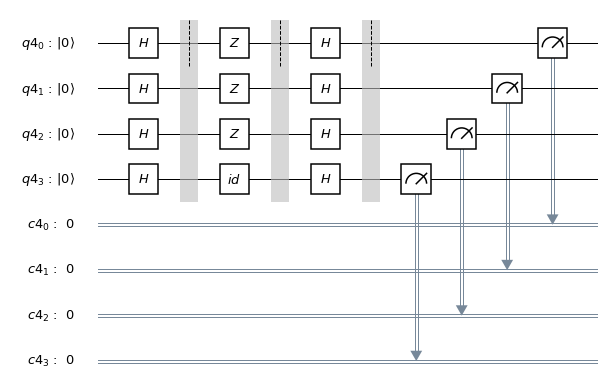

In [26]:
bv.draw(output='mpl')

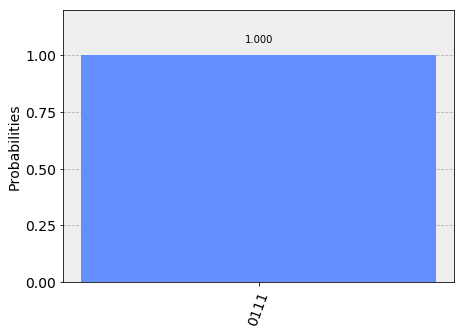

In [27]:
backend = BasicAer.get_backend('qasm_simulator')
results = execute(bv, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)
 